In [93]:
"""
Importing the libraries I need to solve this assignment.
Confusion matrix is imported to check my results in task 3. 
"""
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Oppgave 1A:

In [94]:
#importing the file
data = pd.read_csv('C:/Users/theag/OneDrive/Dokumenter/15 - Maskin læring/assignment1/SpotifyFeatures.csv')
data.head()
#data.shape

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Oppgave 1B:  sortere ut "pop" = 1 og "classic" = 0 \
             finne ut hvor mange det er av hver i filen

In [95]:
## separating the columns: genre, liveness og loudness
df = data[["genre", "liveness", "loudness"]]

## separating pop and classical genre from the rest
df = df.loc[(data.genre.isin(["Pop", "Classical"])) ]
#print(df)

## changing the values of pop and classical to 0 and 1 
df = df.replace("Pop", 0).replace("Classical", 1)
#print(df)


C:\Users\theag\AppData\Local\Temp\ipykernel_18840\1080842311.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("Pop", 0).replace("Classical", 1)


In [96]:
## calculating how many song with pop and classical there is in the dataframe
number_pop = df[(df["genre"] == 0)]
print("Number of songs with pop genre:", len(number_pop))

number_classical = df[(df["genre"] == 1)]
print("Number of songs with classical genre:", len(number_classical))

Number of songs with pop genre: 9386
Number of songs with classical genre: 9256


In [97]:
## Dividing into the two arrays I will work with later in the assignment. 

matrix_X = df[["liveness", "loudness"]]
# print(len(matrix_X))
# print(matrix_X)
y = df[["genre"]]
# print(len(y))
# print(y)

Oppgave 1C

Oppgave 1C:
 lage to numpy array

1: sangene og liveness + loudness

2: vektor med sangenes genre(labels vi vil lære)


In [98]:
## Making one set for training and one set for testing the model 

X_train, X_test, y_train, y_test = train_test_split(matrix_X, y, test_size=0.2, random_state=42) ## kan ta inn shuffle og stratify
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(X_train, y_train)

Oppgave 1D:

C:\Users\theag\AppData\Local\Temp\ipykernel_18840\2216387960.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


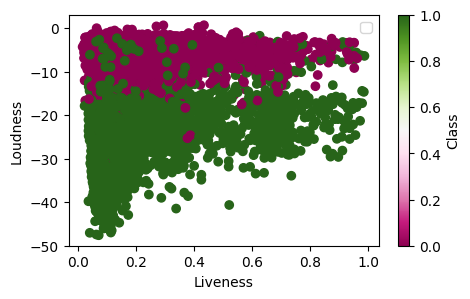

In [99]:
## Kaller bare på loudness og liveness i treningssettet.  


plt.figure(figsize=(5,3))
plt.scatter(matrix_X[['liveness']], matrix_X[['loudness']], c= y['genre'], cmap = "PiYG")
plt.xlabel("Liveness")
plt.ylabel("Loudness")
plt.colorbar(label= "Class")
plt.legend()
plt.show()


### OPPGAVE 2: 


2A:

* Lag din egen logistiske klassifiserer. Bruk treningsdataen til å trene klassifisereren. 

* Du bør bruke en gradient og implementere den i Python. 

* Plot error som en funksjon av epochs(iterasjoner), og rapporter nøyaktigheten på treningssettet. 

Test ulike læringsrater for gradienten. (dw) og forklar hva du observerer ved bruk av de ulike verdiene. 

(Du velger selv om du vil shuffle sangene for å hjelpe læringsprosessen. Det gjør den mer effektiv.)


In [100]:
## Adding one column to each of the sample sets with the value of one. I use this column as bias in the calculations.
# it adds one more column each time it is run so I put it in a singel cell. It is possible til have it run one time by using a if-sentence
X_train = np.append(np.ones((X_train.shape[0], 1)), X_train, axis=1)
X_test = np.append(np.ones((X_test.shape[0], 1)), X_test, axis=1)

[-5.98316495  1.66950122 -0.51857234]
Accuracy for test 0.49527258099899624


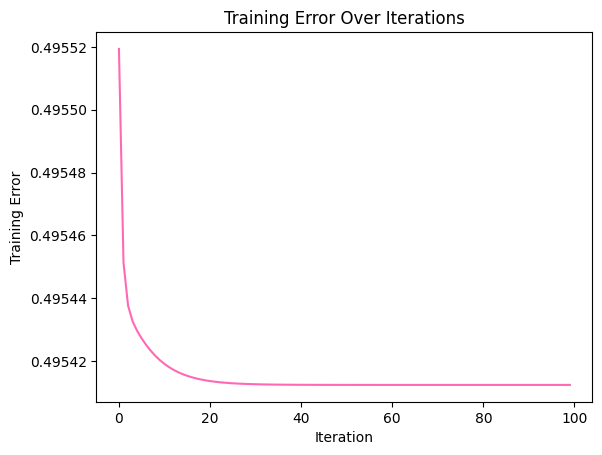

In [101]:
## making my own logistic classifier 
## finding training error 
## making a list with the predictions that is made by the function.

number_features = X_train.shape[1]
weight = np.zeros(number_features)

def sigmoid(X):
    X = np.asarray(X)
    return 1 / (1 + np.exp(-X))

def logistic_regression(X, y, weight, learning_rate = 0.01, epochs = 100):
    X = np.array(X)
    y = np.array(y)

    train_errors = []

    for _ in range(epochs):
        predictions = []
        train_class_acc = []
        for i in range(X.shape[0]):
            #calculating the linear function X in the sigmoid function
            # using [i,:] to force it to go though sample by sample. 
            linear_func = np.dot(weight, X[i,:]) 
            
            #putting the results from the sigmoid function in a list(predictions) 
            prediction = sigmoid(linear_func)
    
            predictions.append(prediction)

            #calculate the derivative of the weight, dw
            dw = X[i,:].T *(prediction - y[i]) 
            weight = weight - learning_rate * dw
            
        train_error = np.mean(np.abs((y - prediction))) ## MAE instead of MSE to make it more precise.
        train_errors.append(train_error)
        train_class_acc.append(np.mean(prediction <= 0.5 == y))
    return weight, train_errors, predictions

weight, train_errors, train_class_acc = logistic_regression(X_train, y_train, weight)
print(weight)

accuracy_test = np.mean(train_class_acc)
print("Accuracy for test",accuracy_test)


plt.plot(train_errors, c = "hotpink")
plt.xlabel('Iteration')
plt.ylabel('Training Error')
plt.title('Training Error Over Iterations')
plt.show()

### Lager for ulike learning rater

0.001, 0.01, 0.1, 1

Oppgave 2B: 

* Test your trained logistic discrimination classifier using the test set. Report the accuracy on the test set.

* Is there a significant difference between the accuracy on the training and test set? If so what might that
indicate. 

In [102]:
# A function for predicting the class of the song sent in to it. 
# running the test set to see if it works.
#class_pred is the final result where the values in y_pred is reviewed. 
# if the value is less than 0.5 genre is 0 and if the value is more than 0.5 the genre is 1. 
# Output is a list of 0,1. 

def predict(X, y, weight):
    linear_pred = np.dot(X, weight)
    y_pred = sigmoid(linear_pred)

    class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
    
    return class_pred, y_pred

print(predict(X = X_test, y = y_test, weight= weight))

class_pred, y_pred = predict(X = X_test, y = y_test, weight= weight)

([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [103]:
# making two variables for test and train 
# this way I can predict the accuracy_score for the prediction function. 

class_pred, y_pred = predict(X = X_test, y = y_test, weight= weight) 
class_pred_1, y_pred_1 = predict(X = X_train, y = y_train, weight= weight) 

accuracy_test = accuracy_score(y_test, class_pred)
print(f'Accuracy is equal to', accuracy_test)

accuracy_train = accuracy_score(y_train, class_pred_1)
print(f'Accuracy is equal to', accuracy_train)

Accuracy is equal to 0.916331456154465
Accuracy is equal to 0.9229531281432307


Oppgave 2C: 

* Extract the learned parameters from your logistic regression and use them to draw the linear
line separating the data on the plot you made in question (1d).

* This may help you understand why your classifier is performing well or not.


C:\Users\theag\AppData\Local\Temp\ipykernel_18840\4085552972.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


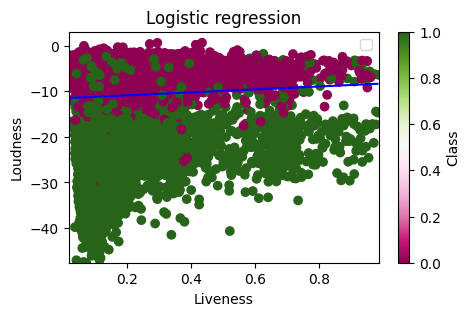

In [104]:

# Creating a grid with the information we have in X_train. 
# This will be the range of the baseline for the linear function.
x1 = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
x2 = np.linspace(X_train[:, 2].min(), X_train[:, 2].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1, x2)

# Calculate the probability of each song to be classic or pop using to lists 
probabilities = sigmoid(weight[0] + weight[1] * x1_grid + weight[2] * x2_grid)
plt.figure(figsize=(5,3))

# Plotting the line based on the probability of the songs genre. 
plt.contour(x1_grid, x2_grid, probabilities, levels=[0.5], colors='blue')

# Plottin the data from task 1. 
plt.scatter(matrix_X[['liveness']], matrix_X[['loudness']], c= y['genre'], cmap = "PiYG")
plt.xlabel("Liveness")
plt.ylabel("Loudness")
plt.title("Logistic regression")
plt.colorbar(label= "Class")
plt.legend()
plt.show()

### OPPGAVE 3

Oppgave 3A:  

Using the classification results from the test set in problem 2, create a confusion matrix for the classification.

Report the confusion matrix.

In [105]:
y_real = np.array(y_test)
y_pred = np.array(class_pred)

#using SKlearn to print the confusion matrix to see how what it should look like. 
confusion_m = confusion_matrix(y_real, y_pred)

print("Confusion Matrix:")
print(confusion_m)

# calculating the confusion matrix´s accuracy
cm_accuracy =(confusion_m[0,0] +confusion_m[1,1]) / (confusion_m[0,0]+confusion_m[0,1]+confusion_m[1,0]+confusion_m[1,1]) * 100
print("Accuracy of confusion matrix:")
print(f'{cm_accuracy:.3f}%')

Confusion Matrix:
[[1746  113]
 [ 199 1671]]
Accuracy of confusion matrix:
91.633%


<Figure size 500x300 with 0 Axes>

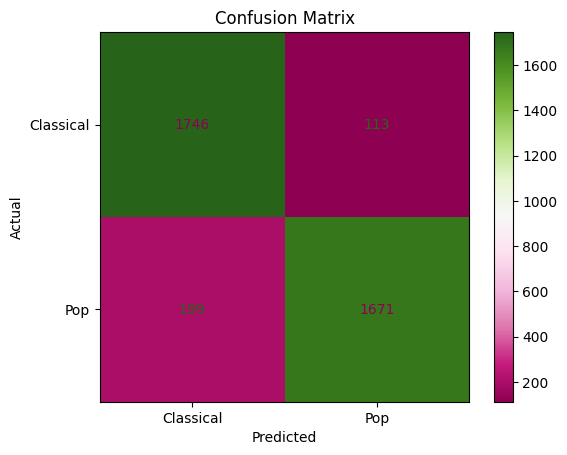

In [106]:
#Making a visual of the confusion matrix
plt.figure(figsize=(5,3))

show = ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels=['Classical', 'Pop'])
show.plot(cmap= 'PiYG') 

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.savefig("3a")
plt.show()

In [107]:
# making a function to manually calculate the confusion matrix
def confusion_m(y_real, y_pred):

    # making a cm matrix to start put in my values when determined.
    cm = np.zeros((2, 2), dtype=int)

    # for each of the sample cm checks if the sum is equal or not and then put them in the right place in the matrix
    cm[0, 0] = np.sum((y_real == 0) & (y_pred == 0))  # true positives

    cm[1, 0] = np.sum((y_real == 1) & (y_pred == 0))  # false positives
    
    cm[0, 1] = np.sum((y_real == 0) & (y_pred == 1))  # false negatives
    
    cm[1, 1] = np.sum((y_real == 1) & (y_pred == 1))  # true negatives

    return cm

y_real = np.array(y_test)
y_pred = np.array(class_pred)

cm = confusion_m(y_real, y_pred)
print("Confusion Matrix:")
print(cm)

#Calculating the accuracy of my confusion matrix
cm_accuracy =(cm[0,0] +cm[1,1]) / (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) * 100
print("Accuracy of the test set in cm_accuracy:")
print(f"{cm_accuracy:.3f}%")

Confusion Matrix:
[[3615755 3316456]
 [3637150 3336080]]
Accuracy of the test set in cm_accuracy:
49.994%


<Figure size 1000x600 with 0 Axes>

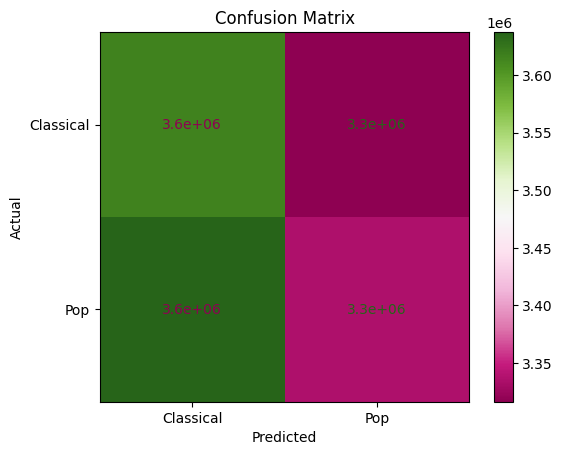

In [108]:
#Making a visual of the confusion matrix using a ConfusionMatrixDisplay
plt.figure(figsize=(10,6))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=['Classical', 'Pop'])
disp.plot(cmap= 'PiYG') 

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.savefig("3a")
plt.show()

Oppgave 3B: 

You should now have two evaluation metrics for the performance of the classifier on the test set; accuracy and the confusion matrix. 

What information does the confusion matrix give you that the accuracy score
does not?

Oppgave 3C: 

Which songs are difficult to classify? 

Could you suggest some Classical songs that a Pop fan would like? (a good song could influence positively the mood of the evaluator)